In [6]:
from __future__ import print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import sin, cos, log, log10, absolute, exp
import scipy as sp
from numpy.polynomial import chebyshev as T
from spectral_tools import Decompose, EdgeDetectT, FilterCoeff, ModalD, NodalD, Vandermonde
from edgedetect import ChebEdge, ConfigurePlots

In [7]:
step_loc = -0.7
x = np.linspace(-1.0, 1.0, 400)
chi = lambda x: 1.0 if (x>=step_loc and x<=(step_loc+1.0)) else 0

c2s, s2c = Vandermonde(32)
a_n = Decompose(chi, c2s)
modalD = ModalD(c2s)

edge = ChebEdge(a_n, x, modalD)

Check whether the edge representations make sense

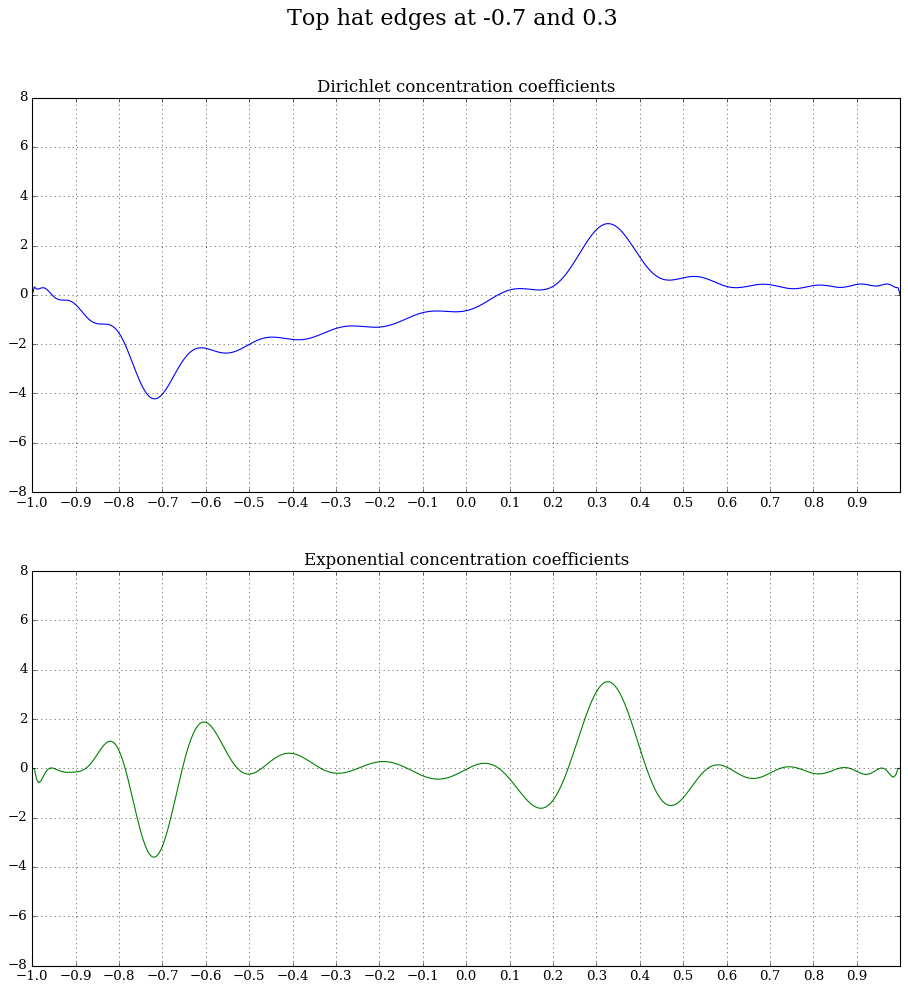

In [8]:
ConfigurePlots()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
plt.suptitle('Top hat edges at %.1f and %.1f' %(step_loc, step_loc+1.0), fontsize=20)
ax1.set_title('Dirichlet concentration coefficients')
ax2.set_title('Exponential concentration coefficients')
ax1.xaxis.set_ticks(np.arange(-1,1,0.1))
ax2.xaxis.set_ticks(np.arange(-1,1,0.1))
ax1.plot(x, edge[:,0], 'b-')
ax2.plot(x, edge[:,-1], 'g-')
plt.subplots_adjust(top=0.9)
plt.show()
plt.close()

<p style=background-color:GreenYellow;>
<i><b>Comment:</b> I do not like that, it is off. Probably within a reasonable error, yet still saddening.<br>
However - the function works, so that is good</i>

The function Enhance in edgedetect.py is defined as follows:

In [9]:
def Enhance(a_n, x, edge, p):

    N = a_n.shape[0]-1
    S_N = T.chebval(x, a_n)
    
    eps = log(N)/N
    J = 0.9*(np.amax(S_N)-np.amin(S_N))*(N**2)

    edge = (eps**(-p/2))*(edge**p)
    edge[absolute(edge) <= J] = 0

    return edge

<p style=background-color:GreenYellow;>
<i><b>Question:</b> Does it look appropriate or have I made something up?</i>

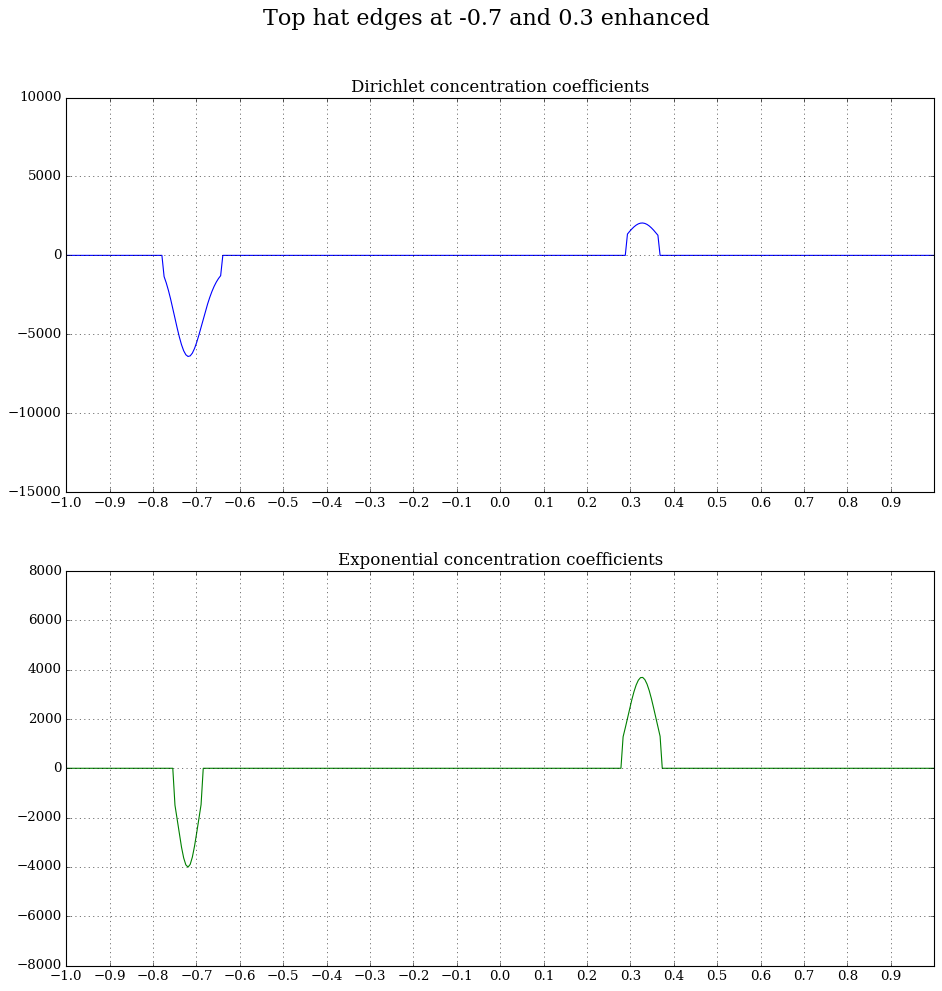

In [10]:
p = 3
enhanced_edge = Enhance(a_n, x, edge, p)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
plt.suptitle('Top hat edges at %.1f and %.1f enhanced' %(step_loc, step_loc+1.0), fontsize=20)
ax1.set_title('Dirichlet concentration coefficients')
ax2.set_title('Exponential concentration coefficients')
ax1.xaxis.set_ticks(np.arange(-1,1,0.1))
ax2.xaxis.set_ticks(np.arange(-1,1,0.1))
ax1.plot(x, enhanced_edge[:,0], 'b-')
ax2.plot(x, enhanced_edge[:,-1], 'g-')
plt.subplots_adjust(top=0.9)
plt.show()
plt.close()

<p style=background-color:GreenYellow;>
<i><b>Comment:</b> Looking quite funky, overall seems to be working, am I correct, Jonah?</i>

plotting results for different p values to see general behaviour


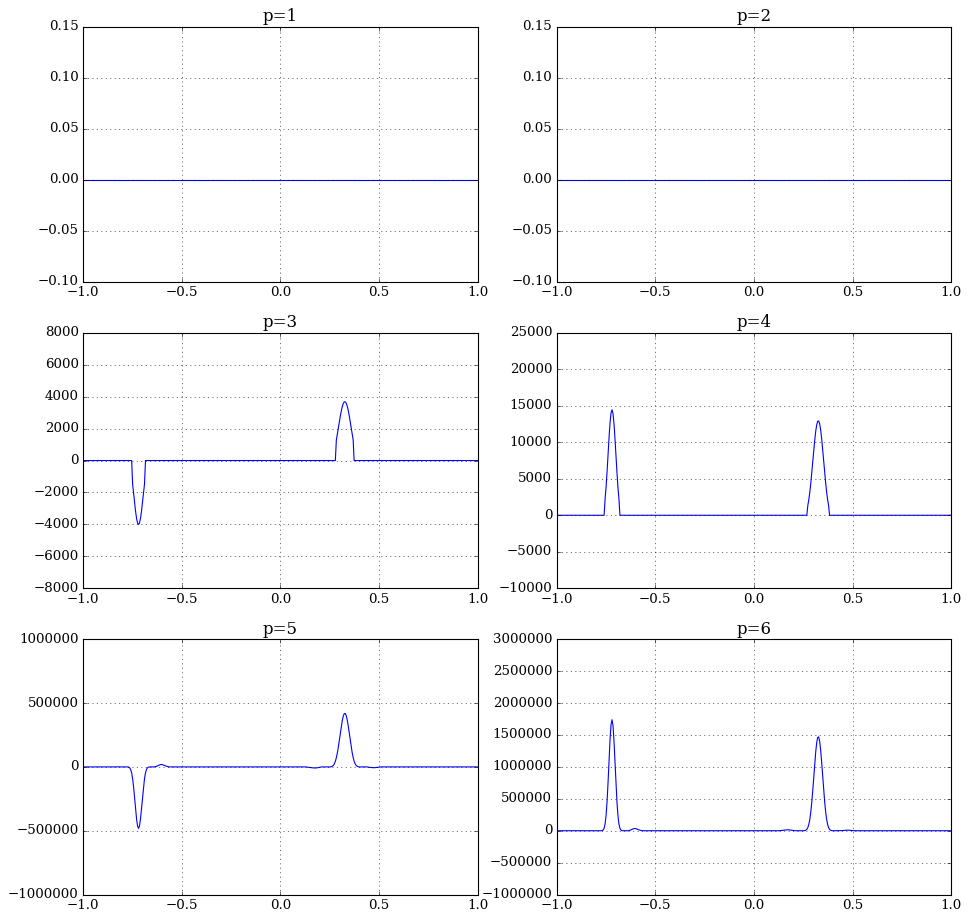

In [25]:
expon_edges = np.empty((len(x), 6))
p_val = np.arange(6)+1

for idx, p in enumerate(p_val):
    expon_edges[:,idx] = Enhance(a_n, x, edge[:,-1], p)
    
fig, axarr = plt.subplots(3,2, figsize=(14,14))
axarr[0, 0].plot(x, expon_edges[:,0])
axarr[0, 0].set_title('p=1')
axarr[0, 1].plot(x, expon_edges[:,1])
axarr[0, 1].set_title('p=2')
axarr[1, 0].plot(x, expon_edges[:,2])
axarr[1, 0].set_title('p=3')
axarr[1, 1].plot(x, expon_edges[:,3])
axarr[1, 1].set_title('p=4')
axarr[2, 0].plot(x, expon_edges[:,4])
axarr[2, 0].set_title('p=5')
axarr[2, 1].plot(x, expon_edges[:,5])
axarr[2, 1].set_title('p=6')
plt.subplots_adjust(wspace=0.2)
plt.show()

<p style=background-color:GreenYellow;>
<i><b>Comment:</b> 
p=3 and p=4 seem to be doing a good job already, there is no need to go into higher orders, as you mention it in the report, right?</i>
</p>